In [3]:
from pyspark.sql.types import StructType, StructField, FloatType, LongType, StringType
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [4]:
# df_business = sqlContext.read.json("dataset/business.json")
# df_checkin = sqlContext.read.json("dataset/checkin.json")
df_review = sqlContext.read.json("dataset/review.json")
df_user = sqlContext.read.json("dataset/user.json")

In [5]:
df_user.select('user_id','fans').filter(df_user['fans']>2000).show()

+--------------------+----+
|             user_id|fans|
+--------------------+----+
|hizGc5W1tBHPghM5Y...|2344|
|iLjMdZi0Tm7DQxX1C...|2052|
|37cpUoM8hlkSQfReI...|6087|
+--------------------+----+



In [6]:
df_user.select('user_id','fans').filter(df_user['fans']==2344).collect()

[Row(user_id='hizGc5W1tBHPghM5YKCAtg', fans=2344)]

In [7]:
reviews = df_review.filter(df_review['user_id'] == "hizGc5W1tBHPghM5YKCAtg")

In [8]:
reviews.count()

18

In [9]:
reviews_pd = reviews.toPandas()

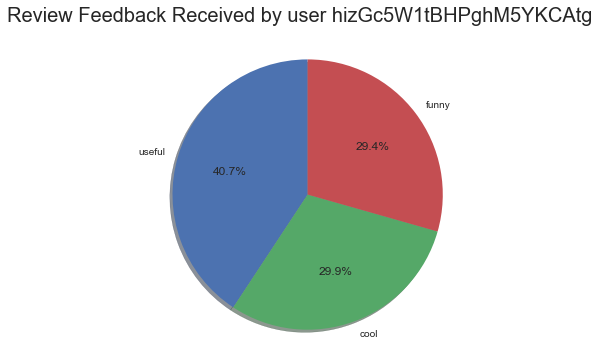

In [10]:
labels = ['useful', 'cool', 'funny']
sizes = [reviews_pd[x].sum() for x in labels]

fig1, ax1 = plt.subplots()
fig1.suptitle('Review Feedback Received by user ' + "hizGc5W1tBHPghM5YKCAtg", fontsize=20)

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [11]:
funniest_review = reviews.select('business_id', 'text', 'funny').agg({"funny": "max"})
coolest_review = reviews.select('business_id', 'text', 'cool').agg({"cool": "max"})
most_useful_review = reviews.select('business_id', 'text', 'useful').agg({"useful": "max"})

In [12]:
funniest_review.show()
coolest_review.show()
most_useful_review.show()

+----------+
|max(funny)|
+----------+
|        43|
+----------+

+---------+
|max(cool)|
+---------+
|       39|
+---------+

+-----------+
|max(useful)|
+-----------+
|        108|
+-----------+



In [13]:
user = df_user.filter(df_user['user_id'] == "hizGc5W1tBHPghM5YKCAtg")

In [14]:
user.toPandas().describe()

average_stars  compliment_cool  compliment_cute  compliment_funny  \
count           1.00              1.0              1.0               1.0   
mean            4.19           6912.0            359.0            6912.0   
std              NaN              NaN              NaN               NaN   
min             4.19           6912.0            359.0            6912.0   
25%             4.19           6912.0            359.0            6912.0   
50%             4.19           6912.0            359.0            6912.0   
75%             4.19           6912.0            359.0            6912.0   
max             4.19           6912.0            359.0            6912.0   

       compliment_hot  compliment_list  compliment_more  compliment_note  \
count             1.0              1.0              1.0              1.0   
mean           6151.0            251.0            396.0           2745.0   
std               NaN              NaN              NaN              NaN   
min            6151.0            251.0            396.0           2745.0   
25%            6151.0            251.0            396.0           2745.0   
50%            6151.0            251.0            396.0           2745.0   
75%            6151.0            251.0            396.0           2745.0   
max            6151.0            251.0            396.0           2745.0   

       compliment_photos  compliment_plain  compliment_profile  \
count                1.0               1.0                 1.0   
mean              1303.0           13123.0               396.0   
std                  NaN               NaN                 NaN   
min               1303.0           13123.0               396.0   
25%               1303.0           13123.0               396.0   
50%               1303.0           13123.0               396.0   
75%               1303.0           13123.0               396.0   
max               1303.0           13123.0               396.0   

       compliment_writer    cool    fans   funny  review_count   useful  
count                1.0     1.0     1.0     1.0           1.0      1.0  
mean              2381.0  9316.0  2344.0  1305.0        1287.0  13057.0  
std                  NaN     NaN     NaN     NaN           NaN      NaN  
min               2381.0  9316.0  2344.0  1305.0        1287.0  13057.0  
25%               2381.0  9316.0  2344.0  1305.0        1287.0  13057.0  
50%               2381.0  9316.0  2344.0  1305.0        1287.0  13057.0  
75%               2381.0  9316.0  2344.0  1305.0        1287.0  13057.0  
max               2381.0  9316.0  2344.0  1305.0        1287.0  13057.0

In [15]:
user_pd = user.toPandas()
cool = user_pd['compliment_cool'][0]
cute = user_pd['compliment_cute'][0]
funny = user_pd['compliment_funny'][0]
hot = user_pd['compliment_hot'][0]
list_var = user_pd['compliment_list'][0]
more = user_pd['compliment_more'][0]
note = user_pd['compliment_note'][0]
photos = user_pd['compliment_photos'][0]
plain = user_pd['compliment_plain'][0]
profile = user_pd['compliment_profile'][0]
writer = user_pd['compliment_writer'][0]

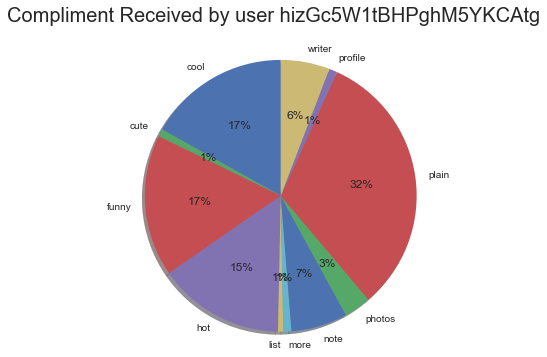

In [16]:
labels = ['cool', 'cute', 'funny', 'hot', 'list', 'more', 'note', 'photos', 'plain', 'profile', 'writer']
sizes = [cool, cute, funny, hot, list_var, more, note, photos, plain, profile, writer]

fig1, ax1 = plt.subplots()
fig1.suptitle('Compliment Received by user ' + "hizGc5W1tBHPghM5YKCAtg", fontsize=20)

ax1.pie(sizes, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()